# IMPORT LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.graph_objects as go
import plotly.express as px



In [3]:
pd.options.display.max_rows = 100
pd.set_option('display.max_colwidth', None)

# IMPORT DATAS

In [4]:
songs_for_4_clusters = pd.read_csv('/Users/alex/Desktop/School_Projects/5_unsupervised_ML/df_audio_features_5000')

In [5]:
songs_for_4_clusters.columns

Index(['name                                                                                                                                                                             ',
       'artist                                          ', 'danceability ',
       'energy   ', 'key ', 'loudness ', 'mode ', 'speechiness ',
       'acousticness ', 'instrumentalness ', 'liveness ', 'valence ',
       'tempo   ', 'type ', 'duration_ms ', 'time_signature ',
       'id                     ', 'html'],
      dtype='object')

## Clean columns name

In [6]:
songs_for_4_clusters.columns = songs_for_4_clusters.columns.str.strip()

In [7]:
songs_for_4_clusters.columns

Index(['name', 'artist', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'duration_ms', 'time_signature', 'id',
       'html'],
      dtype='object')

## Set up the DF

In [8]:
songs_for_4_clusters = songs_for_4_clusters.copy()
songs_for_4_clusters.pop('id')
songs_for_4_clusters.pop('html')
songs_for_4_clusters.pop('duration_ms')
songs_for_4_clusters.pop('time_signature')
songs_for_4_clusters.pop('type')
songs_for_4_clusters.pop('mode')

songs_for_4_clusters = songs_for_4_clusters.set_index(['name', 'artist'])


In [9]:
songs_for_4_clusters.head(3)

danceability  \
name                                                                                                                                                                              artist                                                           
Se Eu Quiser Falar Com Deus                                                                                                                                                       Gilberto Gil                                             0.658   
Saudade De Bahia                                                                                                                                                                  Antônio Carlos Jobim                                     0.742   
Canta Canta, Minha Gente                                                                                                                                                          Martinho Da Vila                                         0.851   

                                                                                                                                                                                                                                    energy  \
name                                                                                                                                                                              artist                                                     
Se Eu Quiser Falar Com Deus                                                                                                                                                       Gilberto Gil                                       0.259   
Saudade De Bahia                                                                                                                                                                  Antônio Carlos Jobim                               0.399   
Canta Canta, Minha Gente                                                                                                                                                          Martinho Da Vila                                   0.730   

                                                                                                                                                                                                                                    key  \
name                                                                                                                                                                              artist                                                  
Se Eu Quiser Falar Com Deus                                                                                                                                                       Gilberto Gil                                       11   
Saudade De Bahia                                                                                                                                                                  Antônio Carlos Jobim                                2   
Canta Canta, Minha Gente                                                                                                                                                          Martinho Da Vila                                    2   

                                                                                                                                                                                                                                    loudness  \
name                                                                                                                                                                              artist                                                       
Se Eu Quiser Falar Com Deus                                                                                                                                     

# CREATE 'MOTHER' CLUSTERS

## Scale Datas

In [10]:
#MinMax Scaler
min_max_df = MinMaxScaler().fit_transform(songs_for_4_clusters)
minmax = pd.DataFrame(min_max_df, columns=songs_for_4_clusters.columns, index=songs_for_4_clusters.index)
# Making the DataFrame for the MinMaxed heatmap
minmax_distances = pd.DataFrame(pairwise_distances(minmax), index=songs_for_4_clusters.index, columns=songs_for_4_clusters.index)

## Standard Scaler
Standard_df = StandardScaler().fit_transform(songs_for_4_clusters)
standard = pd.DataFrame(Standard_df, columns=songs_for_4_clusters.columns, index=songs_for_4_clusters.index)
# Making the DataFrame for the Standard heatmap
standard_distances = pd.DataFrame(pairwise_distances(standard), index=songs_for_4_clusters.index, columns=songs_for_4_clusters.index)


## Quantile Transformer
quantile_df = QuantileTransformer(n_quantiles=len(songs_for_4_clusters)).fit_transform(songs_for_4_clusters)
quantile = pd.DataFrame(quantile_df, columns=songs_for_4_clusters.columns, index=songs_for_4_clusters.index)
# Making the DataFrame for the Quantile heatmap
quantile_distances = pd.DataFrame(pairwise_distances(quantile), index=songs_for_4_clusters.index, columns=songs_for_4_clusters.index)


## Add Clusters column

In [11]:
# 2. initialize the model
my_kmeans = KMeans(n_clusters= 4, random_state=123)
# 3. fit the model to the data
my_kmeans.fit(minmax_distances) 
# 4. obtain the cluster output
clusters = my_kmeans.predict(minmax_distances)
# 5. attach the cluster output to our original DataFrame
songs_for_4_clusters["cluster"] = clusters

/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [12]:
songs_for_4_clusters = songs_for_4_clusters.reset_index()

## Calculate means of each parameters / cluster

In [13]:
results_4_clusters = (
    songs_for_4_clusters.groupby('cluster')[['danceability', 'energy', 'loudness', 'acousticness', 'tempo', 'instrumentalness','key','speechiness', 'valence']]
    .agg({
        'key':'mean', 
        'energy':'mean',
        'loudness':'mean', 
        'acousticness':'mean', 
        'tempo':'mean', 
        'instrumentalness':'mean',
        'speechiness':'mean',
        'valence':'mean'
    })
)

results_4_clusters

key    energy   loudness  acousticness       tempo  \
cluster                                                            
0        5.131298  0.125336 -22.040534      0.939301  104.305608   
1        5.345395  0.757910  -6.268142      0.116393  121.336603   
2        5.345821  0.900095  -7.957723      0.014926  122.282362   
3        4.926526  0.409308 -11.226361      0.708775  116.953313   

         instrumentalness  speechiness   valence  
cluster                                           
0                0.778328     0.045550  0.156501  
1                0.024243     0.089554  0.563147  
2                0.697281     0.107095  0.237377  
3                0.056233     0.061143  0.537781

## Scale again the means and plot the clusters

In [14]:
my_std_scaler = StandardScaler()

my_std_scaler.fit(results_4_clusters)

scaled_results_4_clusters = my_std_scaler.transform(results_4_clusters)

results_4_clusters_distance = pd.DataFrame(scaled_results_4_clusters,index=results_4_clusters.index, columns=results_4_clusters.columns)
results_4_clusters_distance = results_4_clusters_distance.reset_index()

results_4_clusters_distance


cluster       key    energy  loudness  acousticness     tempo  \
0        0 -0.321411 -1.397986 -1.657336      1.269437 -1.662489   
1        1  0.908227  0.693488  0.913655     -0.843264  0.714057   
2        2  0.910677  1.163591  0.638244     -1.103767  0.846030   
3        3 -1.497493 -0.459092  0.105437      0.677594  0.102402   

   instrumentalness  speechiness   valence  
0          1.111857    -1.263414 -1.211484  
1         -1.041804     0.572291  1.056674  
2          0.880388     1.304061 -0.760379  
3         -0.950441    -0.612938  0.915189

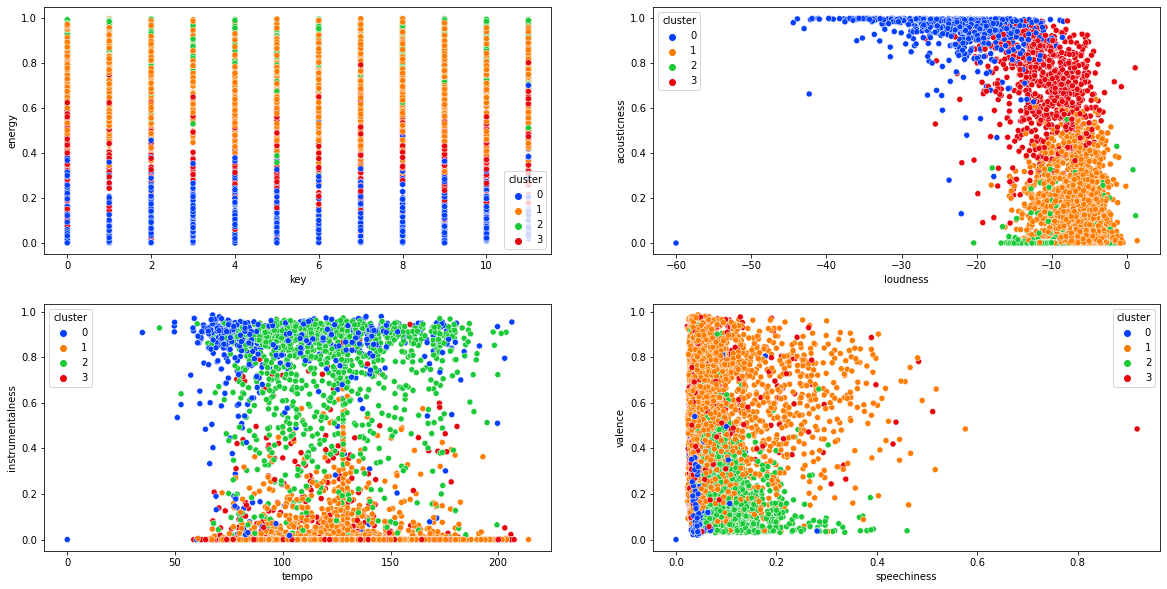

In [15]:
fig, ax = plt.subplots(2,2, figsize=(20, 10))

sns.scatterplot(data = songs_for_4_clusters
            , x = 'key'
            , y = 'energy'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[0,0]);

sns.scatterplot(data = songs_for_4_clusters
            , x = 'loudness'
            , y = 'acousticness'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[0,1]);

sns.scatterplot(data = songs_for_4_clusters
            , x = 'tempo'
            , y = 'instrumentalness'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[1,0]);

sns.scatterplot(data = songs_for_4_clusters
            , x = 'speechiness'
            , y = 'valence'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[1,1]);

Parameters that have big impact : 
* Instrumentalness
* Acousticness
* Energy 

In [16]:
songs_for_4_clusters.groupby('cluster')['name'].count()

cluster
0     655
1    2736
2    1041
3     803
Name: name, dtype: int64

# CREATE DF WITH ONLY PARAMETERS WE CHOOSE

In [17]:
songs_for_4_clusters_subclusters = (
    songs_for_4_clusters[[
        'name', 
        'artist',
        'cluster',
        'energy', 
        'acousticness', 
        'instrumentalness']])

## Create DF for each Mother clusters

In [18]:
cluster_0 = songs_for_4_clusters_subclusters.loc[songs_for_4_clusters_subclusters.cluster == 0,:]
cluster_1 = songs_for_4_clusters_subclusters.loc[songs_for_4_clusters_subclusters.cluster == 1,:]
cluster_2 = songs_for_4_clusters_subclusters.loc[songs_for_4_clusters_subclusters.cluster == 2,:]
cluster_3 = songs_for_4_clusters_subclusters.loc[songs_for_4_clusters_subclusters.cluster == 3,:]

cluster_0 = cluster_0.set_index(['name', 'artist'])
cluster_1 = cluster_1.set_index(['name', 'artist'])
cluster_2 = cluster_2.set_index(['name', 'artist'])
cluster_3 = cluster_3.set_index(['name', 'artist'])

## Cluster 0

In [19]:
cluster_0.head(5)

cluster  \
name                                                                                                                                                                              artist                                                      
Não Sei                                                                                                                                                                           Sílvia Pérez Cruz                                       0   
Aquarela Do Brasil                                                                                                                                                                Carlos Barbosa-Lima                                     0   
Brigas Nunca Mais                                                                                                                                                                 Brazilian Jazz                                          0   
Aquarela Do Brasil                                                                                                                                                                Voyager                                                 0   
O Amor Em Paz                                                                                                                                                                     Cannonball Adderley                                     0   

                                                                                                                                                                                                                                    energy  \
name                                                                                                                                                                              artist                                                     
Não Sei                                                                                                                                                                           Sílvia Pérez Cruz                                 0.0866   
Aquarela Do Brasil                                                                                                                                                                Carlos Barbosa-Lima                               0.2520   
Brigas Nunca Mais                                                                                                                                                                 Brazilian Jazz                                    0.2760   
Aquarela Do Brasil                                                                                                                                                                Voyager                                           0.1450   
O Amor Em Paz                                                                                                                                                                     Cannonball Adderley                               0.2810   

                                                                                                                                                                                                                                    acousticness  \
name                                                                                                                                                                              artist                                                           
Não Sei                                                                                                                                                                           Sílvia Pérez Cruz                                        0.978   
Aquarela Do Brasil                                                                                                                                         

### Scaling

In [20]:
#MinMax Scaler
cluster_0_Scaler = MinMaxScaler().fit_transform(cluster_0)
minmax0 = pd.DataFrame(cluster_0_Scaler, columns=cluster_0.columns, index=cluster_0.index)
# Making the DataFrame for the MinMaxed heatmap
cluster_0_distances = pd.DataFrame(pairwise_distances(minmax0), index=cluster_0.index, columns=cluster_0.index)

### KMean


In [21]:
# 2. initialize the model
my_kmeans = KMeans(n_clusters= 3, random_state=123)
# 3. fit the model to the data
my_kmeans.fit(cluster_0_distances) 
# 4. obtain the cluster output
clusters = my_kmeans.predict(cluster_0_distances)
# 5. attach the cluster output to our original DataFrame
cluster_0["cluster"] = clusters

/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


### Scatterplots to see parameters / Cluster

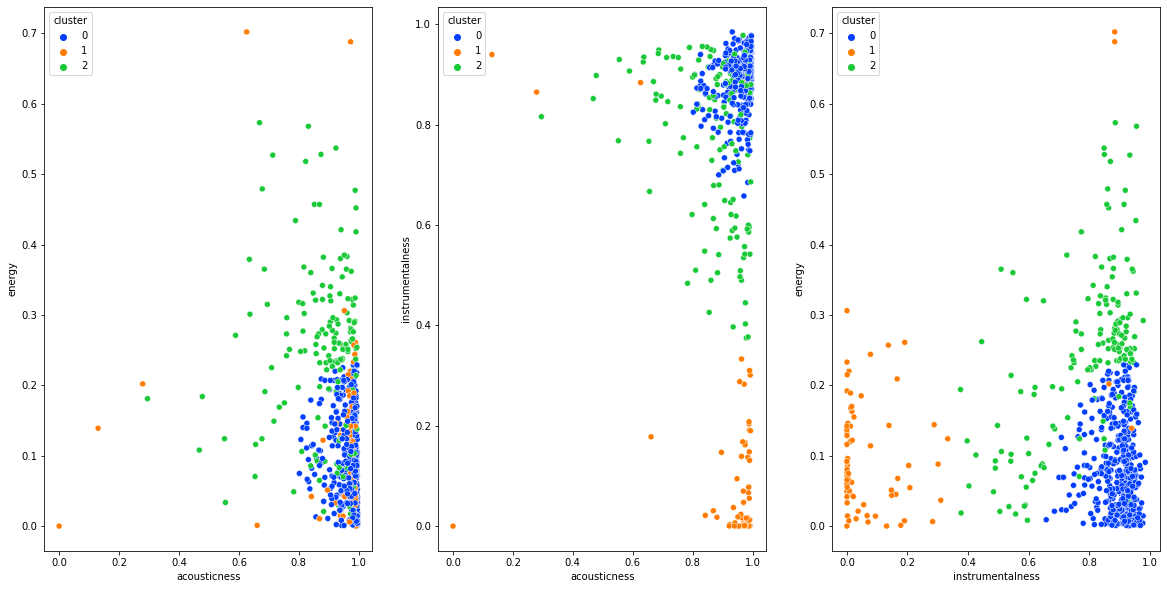

In [22]:
fig, ax = plt.subplots(1,3, figsize=(20, 10))

sns.scatterplot(data = cluster_0
            , x = 'acousticness'
            , y = 'energy'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[0]);

sns.scatterplot(data = cluster_0
            , x = 'acousticness'
            , y = 'instrumentalness'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[1]);

sns.scatterplot(data = cluster_0
            , x = 'instrumentalness'
            , y = 'energy'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[2]);


### Create DF with 5 songs from each clusters to make sure clusters makes sense

In [34]:
sample_results_0 = (
    cluster_0.groupby('cluster').head(5).sort_values(by='cluster')
)

sample_results_0

cluster  \
name                                                                                                                                                                              artist                                                      
Aquarela Do Brasil                                                                                                                                                                Voyager                                                 0   
O Pato (The Duck) - Live At Carnegie Hall/1964                                                                                                                                    João Gilberto                                           0   
Sigur 1 (Untitled)                                                                                                                                                                Sigur Rós                                               0   
Deus Ibi Est                                                                                                                                                                      Isobel Campbell                                         0   
Albatross - 2018 Remaster                                                                                                                                                         Fleetwood Mac                                           0   
Não Sei                                                                                                                                                                           Sílvia Pérez Cruz                                       1   
Shake It Off                                                                                                                                                                      Taylor Swift                                            1   
Piano Quartet in G Minor, K.478: II. Andante                                                                                                                                      Wolfgang Amadeus Mozart                                 1   
Vocalise No. 2 - Andantino                                                                                                                                                        Milosz Magin                                            1   
Romance for Violin and Piano, Op. 23                                                                                                                                              Amy Beach                                               1   
Aquarela Do Brasil                                                                                                                                                                Carlos Barbosa-Lima                                     2   
Brigas Nunca Mais                                                                                                                                                                 Brazilian Jazz                                          2   
O Amor Em Paz                                                                                                                                                                     Cannonball Adderley                                     2   
Triste                                                                                                                                                                            Brazilian Jazz                                          2   
Apelo                                                                                                                                                                             Brazilian Jazz                                          2   

                                                                                                                                                                    

In [24]:
cluster_0.cluster.value_counts()

0    422
2    157
1     76
Name: cluster, dtype: int64

## Cluster 1

In [25]:
cluster_1.head(5)

cluster  \
name                                                                                                                                                                              artist                                                      
Saudade De Bahia                                                                                                                                                                  Antônio Carlos Jobim                                    1   
Canta Canta, Minha Gente                                                                                                                                                          Martinho Da Vila                                        1   
Brigas Nunca Mais                                                                                                                                                                 Paula Morelenbaum                                       1   
Aqua De Coco                                                                                                                                                                      Marcos Valle                                            1   
Mas Que Nada                                                                                                                                                                      Rio Combo                                               1   

                                                                                                                                                                                                                                    energy  \
name                                                                                                                                                                              artist                                                     
Saudade De Bahia                                                                                                                                                                  Antônio Carlos Jobim                               0.399   
Canta Canta, Minha Gente                                                                                                                                                          Martinho Da Vila                                   0.730   
Brigas Nunca Mais                                                                                                                                                                 Paula Morelenbaum                                  0.546   
Aqua De Coco                                                                                                                                                                      Marcos Valle                                       0.732   
Mas Que Nada                                                                                                                                                                      Rio Combo                                          0.539   

                                                                                                                                                                                                                                    acousticness  \
name                                                                                                                                                                              artist                                                           
Saudade De Bahia                                                                                                                                                                  Antônio Carlos Jobim                                     0.217   
Canta Canta, Minha Gente                                                                                                                                   

### Scaling

In [26]:
#MinMax Scaler
Cluster_1_Scaler = MinMaxScaler().fit_transform(cluster_1)
minmax1 = pd.DataFrame(Cluster_1_Scaler, columns=cluster_1.columns, index=cluster_1.index)
# Making the DataFrame for the MinMaxed heatmap
cluster_1_distances = pd.DataFrame(pairwise_distances(minmax1), index=cluster_1.index, columns=cluster_1.index)

### KMean


In [27]:
# 2. initialize the model
my_kmeans = KMeans(n_clusters= 7, random_state=123)
# 3. fit the model to the data
my_kmeans.fit(cluster_1_distances) 
# 4. obtain the cluster output
clusters = my_kmeans.predict(cluster_1_distances)
# 5. attach the cluster output to our original DataFrame
cluster_1["cluster"] = clusters

/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


### Scatterplots to see parameters / Cluster

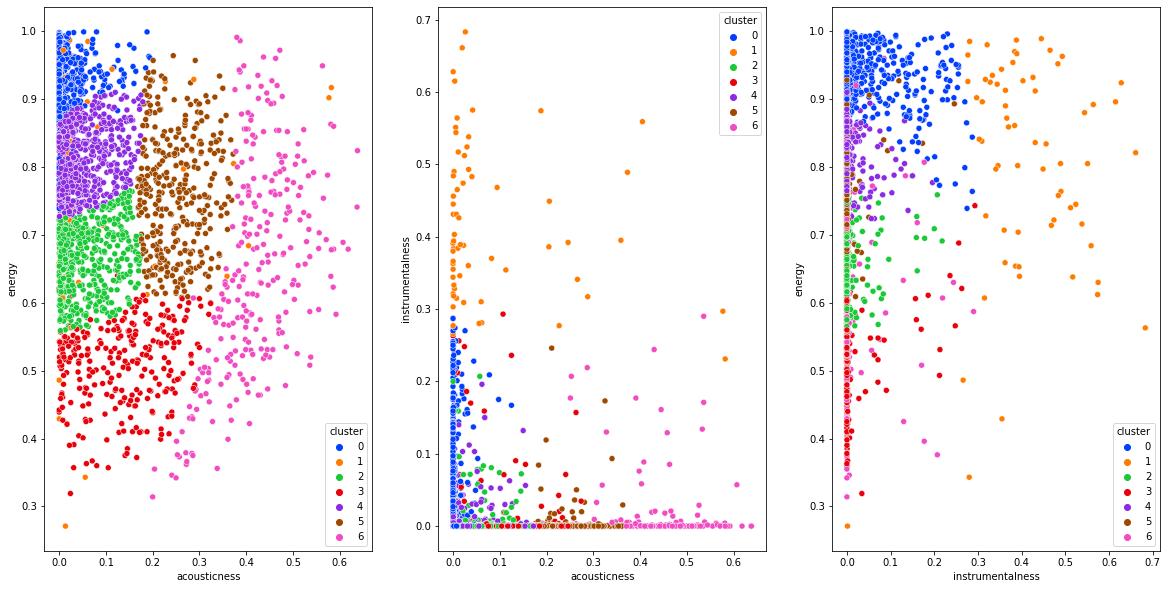

In [28]:
fig, ax = plt.subplots(1,3, figsize=(20, 10))

sns.scatterplot(data = cluster_1
            , x = 'acousticness'
            , y = 'energy'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[0]);

sns.scatterplot(data = cluster_1
            , x = 'acousticness'
            , y = 'instrumentalness'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[1]);

sns.scatterplot(data = cluster_1
            , x = 'instrumentalness'
            , y = 'energy'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[2]);


### Create DF with 5 songs from each clusters to make sure clusters make sense

In [35]:
sample_results_1 = (
    cluster_1.groupby('cluster').head(5).sort_values(by='cluster')
)

sample_results_1

cluster  \
name                                                                                                                                                                              artist                                                      
Tirei o Chapéu                                                                                                                                                                    Batida                                                  0   
Inbetween Days                                                                                                                                                                    The Cure                                                0   
Game Of Pricks                                                                                                                                                                    Guided By Voices                                        0   
Odessa                                                                                                                                                                            Caribou                                                 0   
It's Real                                                                                                                                                                         Real Estate                                             0   
Shadows                                                                                                                                                                           Au Revoir Simone                                        1   
Pobre e Rico                                                                                                                                                                      Batida                                                  1   
Someone for You                                                                                                                                                                   Warm Soda                                               1   
Parabens                                                                                                                                                                          Marcos Valle                                            1   
Os Grilos                                                                                                                                                                         Marcos Valle                                            1   
Maroca                                                                                                                                                                            Mundo Livre                                             2   
A New Error                                                                                                                                                                       Moderat                                                 2   
I Wish You Were Here                                                                                                                                                              Alpha Blondy                                            2   
Magalenha                                                                                                                                                                         Sérgio Mendes                                           2   
Alegria                                                                                                                                                                           Batida                                                  2   
Mas Que Nada                                                                                                                                                         

In [36]:
cluster_1.cluster = cluster_1.cluster + cluster_0.cluster.max()
cluster_1.cluster.value_counts()

6    657
2    598
4    496
7    364
5    287
8    267
3     67
Name: cluster, dtype: int64

## Cluster 2

In [37]:
cluster_2.head(5)

cluster  \
name                                                                                                                                                                              artist                                                      
Manada                                                                                                                                                                            Bagunço                                                 2   
Oats In The Water                                                                                                                                                                 Ben Howard                                              2   
Under Your Spell                                                                                                                                                                  Desire                                                  2   
La Nueva Reconquista de Graná                                                                                                                                                     Grupo De Expertos Solynieve                             2   
How to Disappear Completely                                                                                                                                                       Radiohead                                               2   

                                                                                                                                                                                                                                    energy  \
name                                                                                                                                                                              artist                                                     
Manada                                                                                                                                                                            Bagunço                                            0.485   
Oats In The Water                                                                                                                                                                 Ben Howard                                         0.475   
Under Your Spell                                                                                                                                                                  Desire                                             0.599   
La Nueva Reconquista de Graná                                                                                                                                                     Grupo De Expertos Solynieve                        0.640   
How to Disappear Completely                                                                                                                                                       Radiohead                                          0.302   

                                                                                                                                                                                                                                    acousticness  \
name                                                                                                                                                                              artist                                                           
Manada                                                                                                                                                                            Bagunço                                                 0.1160   
Oats In The Water                                                                                                                                          

### Scaling

In [38]:
#MinMax Scaler
Cluster_2_Scaler = MinMaxScaler().fit_transform(cluster_2)
minmax2 = pd.DataFrame(Cluster_2_Scaler, columns=cluster_2.columns, index=cluster_2.index)
# Making the DataFrame for the MinMaxed heatmap
cluster_2_distances = pd.DataFrame(pairwise_distances(minmax2), index=cluster_2.index, columns=cluster_2.index)

### KMean


In [39]:
# 2. initialize the model
my_kmeans = KMeans(n_clusters= 4, random_state=123)
# 3. fit the model to the data
my_kmeans.fit(cluster_2_distances) 
# 4. obtain the cluster output
clusters = my_kmeans.predict(cluster_2_distances)
# 5. attach the cluster output to our original DataFrame
cluster_2["cluster"] = clusters

/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


### Scatterplots to see parameters / Cluster

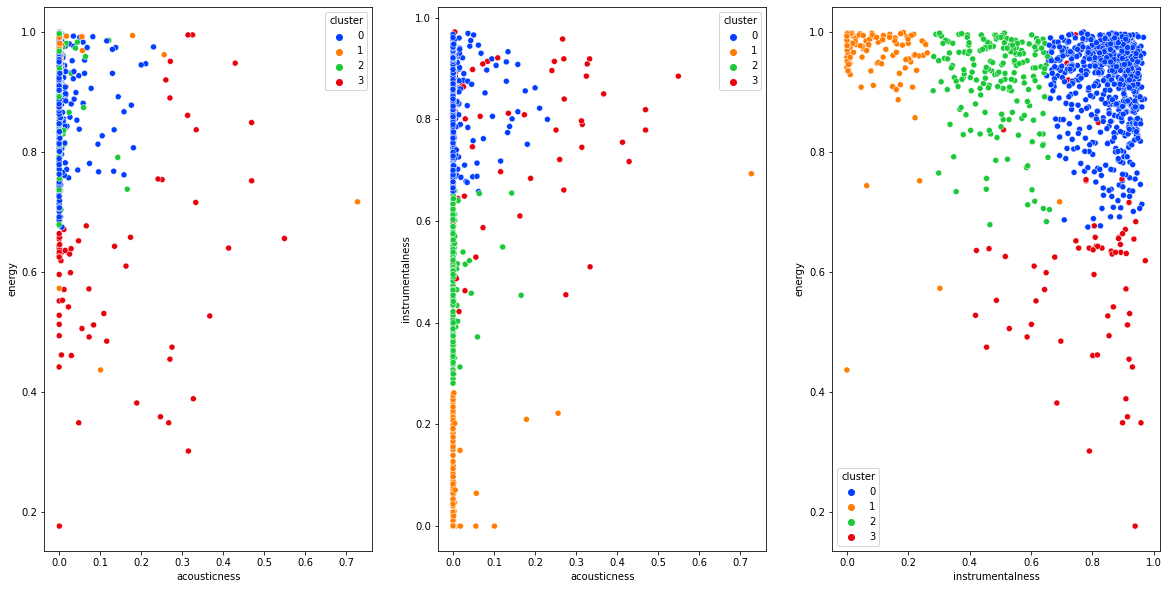

In [40]:
fig, ax = plt.subplots(1,3, figsize=(20, 10))

sns.scatterplot(data = cluster_2
            , x = 'acousticness'
            , y = 'energy'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[0]);

sns.scatterplot(data = cluster_2
            , x = 'acousticness'
            , y = 'instrumentalness'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[1]);

sns.scatterplot(data = cluster_2
            , x = 'instrumentalness'
            , y = 'energy'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[2]);


### Create DF with 5 songs from each clusters to make sure clusters make sense

In [41]:
sample_results_2 = (
    cluster_2.groupby('cluster').head(5).sort_values(by='cluster')
)

sample_results_2

cluster  \
name                                                                                                                                                                              artist                                                      
You Can Get It If You Really Want                                                                                                                                                 Desmond Dekker                                          0   
Invisible Man                                                                                                                                                                     The Breeders                                            0   
Come Saturday                                                                                                                                                                     The Pains Of Being Pure At Heart                        0   
Objecte Pur                                                                                                                                                                       Isaac Ulam                                              0   
Red Eyes                                                                                                                                                                          The War On Drugs                                        0   
South Of Heaven                                                                                                                                                                   Slayer                                                  1   
Dusk Till Dawn - Radio Edit                                                                                                                                                       ZAYN                                                    1   
Unfucktheworld                                                                                                                                                                    Angel Olsen                                             1   
You Can't Bring Me Down                                                                                                                                                           Suicidal Tendencies                                     1   
My Curse                                                                                                                                                                          Killswitch Engage                                       1   
Let's Get Out Of This Country                                                                                                                                                     Camera Obscura                                          2   
There She Goes                                                                                                                                                                    The La's                                                2   
She's A Rainbow - Stereo Full Version / With Intro                                                                                                                                The Rolling Stones                                      2   
Pretty Machines                                                                                                                                                                   Parquet Courts                                          2   
Let's Get Out Of Here                                                                                                                                                             Les Savy Fav                                            2   
How to Disappear Completely                                                                                                                                          

In [42]:
cluster_2.cluster = cluster_2.cluster + cluster_1.cluster.max()
cluster_2.cluster.value_counts()

8     668
10    191
9     114
11     68
Name: cluster, dtype: int64

## Cluster 3

In [43]:
cluster_3.head(5)

cluster  \
name                                                                                                                                                                              artist                                                      
Se Eu Quiser Falar Com Deus                                                                                                                                                       Gilberto Gil                                            3   
Mulher Eu Sei                                                                                                                                                                     Chico César                                             3   
Rosa Morena                                                                                                                                                                       Kurt Elling                                             3   
Desafinado                                                                                                                                                                        Stan Getz                                               3   
Madalena                                                                                                                                                                          Maria Gasolina                                          3   

                                                                                                                                                                                                                                    energy  \
name                                                                                                                                                                              artist                                                     
Se Eu Quiser Falar Com Deus                                                                                                                                                       Gilberto Gil                                      0.2590   
Mulher Eu Sei                                                                                                                                                                     Chico César                                       0.0502   
Rosa Morena                                                                                                                                                                       Kurt Elling                                       0.1190   
Desafinado                                                                                                                                                                        Stan Getz                                         0.1460   
Madalena                                                                                                                                                                          Maria Gasolina                                    0.2070   

                                                                                                                                                                                                                                    acousticness  \
name                                                                                                                                                                              artist                                                           
Se Eu Quiser Falar Com Deus                                                                                                                                                       Gilberto Gil                                             0.694   
Mulher Eu Sei                                                                                                                                              

### Scaling

In [44]:
#MinMax Scaler
cluster_3_Scaler = MinMaxScaler().fit_transform(cluster_3)
minmax3 = pd.DataFrame(cluster_3_Scaler, columns=cluster_3.columns, index=cluster_3.index)
# Making the DataFrame for the MinMaxed heatmap
cluster_3_distances = pd.DataFrame(pairwise_distances(minmax3), index=cluster_3.index, columns=cluster_3.index)

### KMean


In [45]:
# 2. initialize the model
my_kmeans = KMeans(n_clusters= 4, random_state=123)
# 3. fit the model to the data
my_kmeans.fit(cluster_3_distances) 
# 4. obtain the cluster output
clusters = my_kmeans.predict(cluster_3_distances)
# 5. attach the cluster output to our original DataFrame
cluster_3["cluster"] = clusters

/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


### Scatterplots to see parameters / Cluster

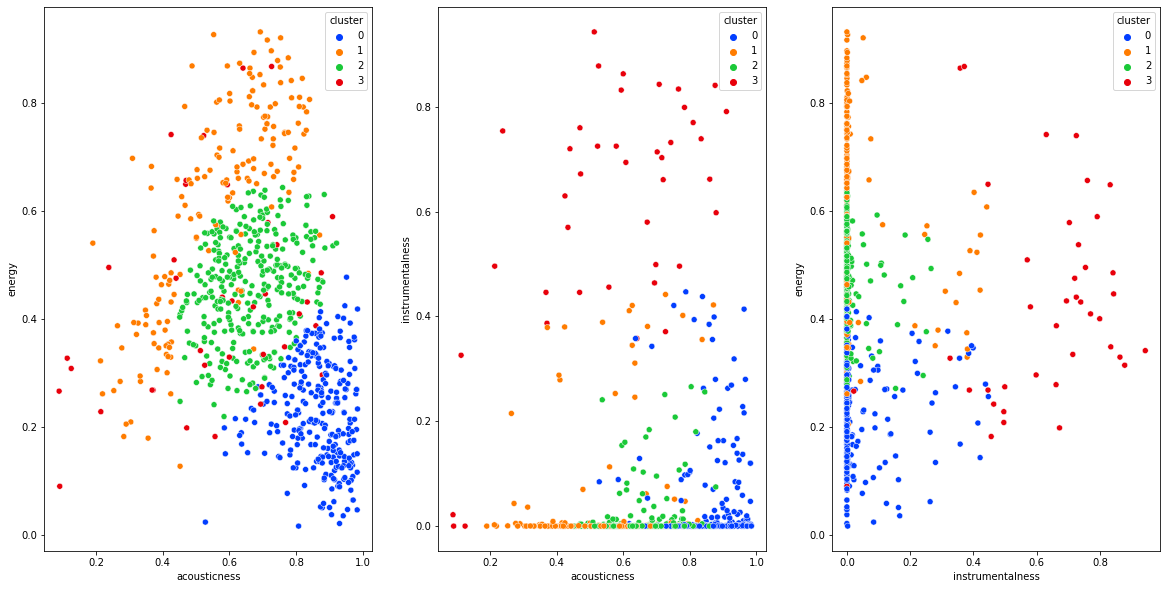

In [46]:
fig, ax = plt.subplots(1,3, figsize=(20, 10))

sns.scatterplot(data = cluster_3
            , x = 'acousticness'
            , y = 'energy'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[0]);

sns.scatterplot(data = cluster_3
            , x = 'acousticness'
            , y = 'instrumentalness'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[1]);

sns.scatterplot(data = cluster_3
            , x = 'instrumentalness'
            , y = 'energy'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[2]);


### Create DF with 5 songs of each cluster to make sure clusters make sense

In [47]:
sample_results_3 = (
    cluster_3.groupby('cluster').head(5).sort_values(by='cluster')
)

sample_results_3

cluster  \
name                                                                                                                                                                              artist                                                      
Se Eu Quiser Falar Com Deus                                                                                                                                                       Gilberto Gil                                            0   
Mulher Eu Sei                                                                                                                                                                     Chico César                                             0   
Rosa Morena                                                                                                                                                                       Kurt Elling                                             0   
Desafinado                                                                                                                                                                        Stan Getz                                               0   
Madalena                                                                                                                                                                          Maria Gasolina                                          0   
Pais Tropical                                                                                                                                                                     Sergio Mendes & Brasil '66                              1   
Mariana                                                                                                                                                                           Seu Jorge                                               1   
Já Sei Namorar - 2004 Digital Remaster                                                                                                                                            Tribalistas                                             1   
Água de beber                                                                                                                                                                     Tania Maria                                             1   
O Meu Amor É Glòria                                                                                                                                                               Sílvia Pérez Cruz                                       1   
Águas De Março                                                                                                                                                                    Antônio Carlos Jobim                                    2   
Don't Stop the Carnival                                                                                                                                                           Sonny Rollins                                           2   
Aquarela Do Brasil                                                                                                                                                                Gal Costa                                               2   
Mariana                                                                                                                                                                           Bïa                                                     2   
Samba de Verão                                                                                                                                                                    Marcos Valle                                            2   
Blue Bossa - Remastered                                                                                                                                              

In [48]:
cluster_3.cluster = cluster_3.cluster + cluster_2.cluster.max()
cluster_3.cluster.value_counts()

13    316
11    276
12    170
14     41
Name: cluster, dtype: int64

# Big DF with all clusters

In [49]:
all_clusters_df = pd.concat([cluster_0, cluster_1, cluster_2, cluster_3], axis=0)
all_clusters_df.head(10)

cluster  \
name                                                                                                                                                                              artist                                                      
Não Sei                                                                                                                                                                           Sílvia Pérez Cruz                                       1   
Aquarela Do Brasil                                                                                                                                                                Carlos Barbosa-Lima                                     2   
Brigas Nunca Mais                                                                                                                                                                 Brazilian Jazz                                          2   
Aquarela Do Brasil                                                                                                                                                                Voyager                                                 0   
O Amor Em Paz                                                                                                                                                                     Cannonball Adderley                                     2   
O Pato (The Duck) - Live At Carnegie Hall/1964                                                                                                                                    João Gilberto                                           0   
Triste                                                                                                                                                                            Brazilian Jazz                                          2   
Apelo                                                                                                                                                                             Brazilian Jazz                                          2   
O Que É, O Que É                                                                                                                                                                  Cesar Camargo Mariano & Romero Lubambo                  2   
Samba Da Minha Terra - Live At Carnegie Hall/1964                                                                                                                                 Stan Getz                                               2   

                                                                                                                                                                                                                                    energy  \
name                                                                                                                                                                              artist                                                     
Não Sei                                                                                                                                                                           Sílvia Pérez Cruz                                 0.0866   
Aquarela Do Brasil                                                                                                                                                                Carlos Barbosa-Lima                               0.2520   
Brigas Nunca Mais                                                                                                                                                                 Brazilian Jazz                                    0.2760   
Aquarela Do Brasil                                                                                                                                                       

## Plot all clusters

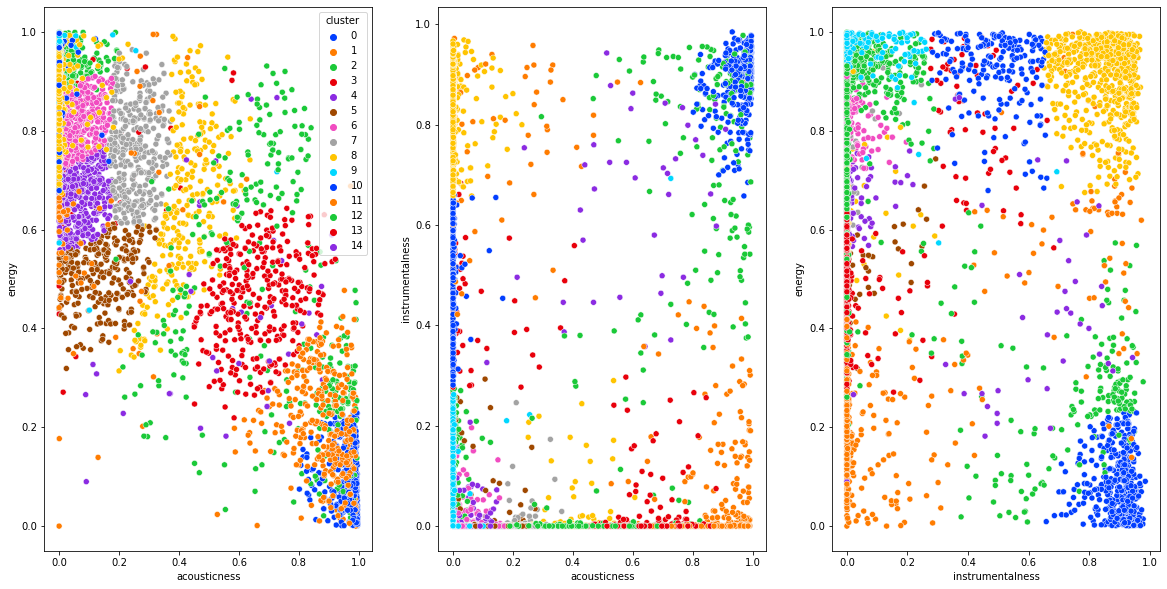

In [50]:
fig, ax = plt.subplots(1,3, figsize=(20, 10))

sns.scatterplot(data = all_clusters_df
            , x = 'acousticness'
            , y = 'energy'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[0]);

sns.scatterplot(data = all_clusters_df
            , x = 'acousticness'
            , y = 'instrumentalness'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[1]
            ,legend=False);

sns.scatterplot(data = all_clusters_df
            , x = 'instrumentalness'
            , y = 'energy'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[2]
            , legend=False);


In [51]:
all_clusters_df.groupby('cluster').count()

energy  acousticness  instrumentalness
cluster                                        
0           422           422               422
1            76            76                76
2           755           755               755
3            67            67                67
4           496           496               496
5           287           287               287
6           657           657               657
7           364           364               364
8           935           935               935
9           114           114               114
10          191           191               191
11          344           344               344
12          170           170               170
13          316           316               316
14           41            41                41

In [52]:
all_clusters_df = all_clusters_df.reset_index().set_index(['name', 'artist','cluster'])

## Scale Datas and Plot

In [53]:
#MinMax Scaler
min_max_df = MinMaxScaler().fit_transform(all_clusters_df)
minmax = pd.DataFrame(min_max_df, columns=all_clusters_df.columns, index=all_clusters_df.index)
# Making the DataFrame for the MinMaxed heatmap
all_minmax_distances = pd.DataFrame(pairwise_distances(minmax), index=all_clusters_df.index, columns=all_clusters_df.index)

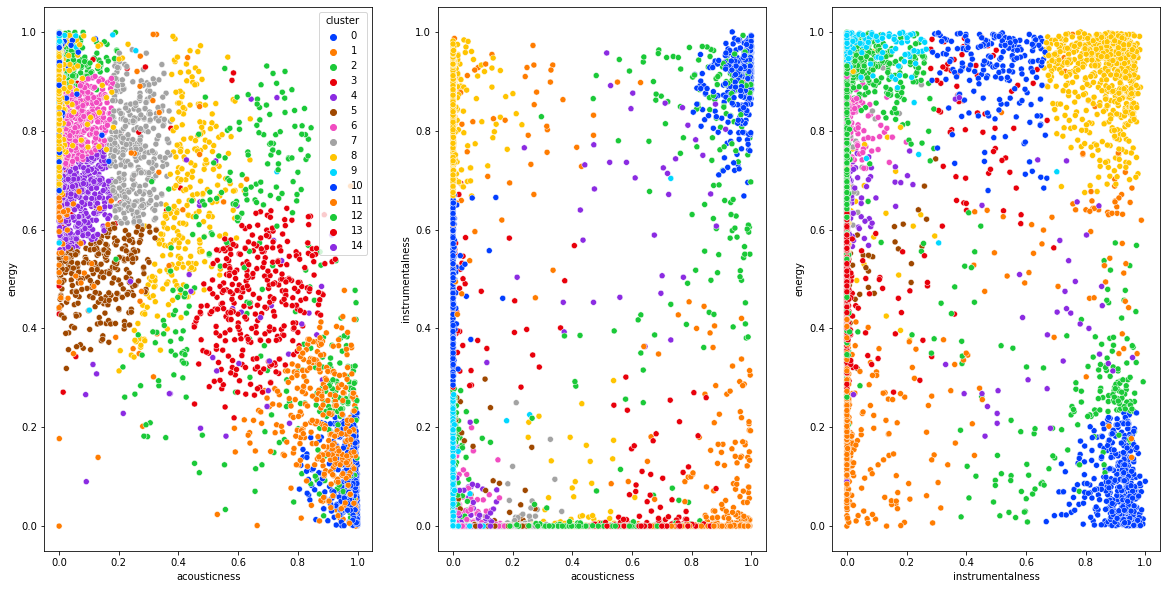

In [54]:
fig, ax = plt.subplots(1,3, figsize=(20, 10))

sns.scatterplot(data = minmax
            , x = 'acousticness'
            , y = 'energy'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[0]);

sns.scatterplot(data = minmax
            , x = 'acousticness'
            , y = 'instrumentalness'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[1]
            , legend=False);

sns.scatterplot(data = minmax
            , x = 'instrumentalness'
            , y = 'energy'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[2]
            , legend=False);


## Create DF with 5 songs from each clusters to make sure clusters make sense

In [59]:
all_clusters_df = all_clusters_df.reset_index()
all_clusters_df.groupby('cluster')[['name', 'artist', 'cluster']].head(5).sort_values(by='cluster')

name  \
15    Sigur 1 (Untitled)                                                                                                                                                                  
3     Aquarela Do Brasil                                                                                                                                                                  
5     O Pato (The Duck) - Live At Carnegie Hall/1964                                                                                                                                      
22    Albatross - 2018 Remaster                                                                                                                                                           
17    Deus Ibi Est                                                                                                                                                                        
168     Romance for Violin and Piano, Op. 23                                                                                                                                              
97    Vocalise No. 2 - Andantino                                                                                                                                                          
91      Piano Quartet in G Minor, K.478: II. Andante                                                                                                                                      
20    Shake It Off                                                                                                                                                                        
0     Não Sei                                                                                                                                                                             
7     Apelo                                                                                                                                                                               
6     Triste                                                                                                                                                                              
4     O Amor Em Paz                                                                                                                                                                       
2     Brigas Nunca Mais                                                                                                                                                                   
1     Aquarela Do Brasil                                                                                                                                                                  
662   Os Grilos                                                                                                                                                                           
660   Parabens                                                                                                                                                                            
727   Someone for You                                                                                                                                                                     
680   Pobre e Rico                                                                                                                                                                        
689   Shadows                                                                                                                                                                             
664   Maroca                                                                                                                                                                              
694   A New Error                                                

In [60]:
all_clusters_df.groupby('artist')['cluster'].nunique().reset_index().agg({'cluster':'mean'})

cluster    1.571691
dtype: float64

# WITHOUT SUBCLUSTERING

In [61]:
songs_df = songs_for_4_clusters[['name','artist','energy','acousticness','instrumentalness']]

In [62]:
songs_df = songs_df.set_index(['name', 'artist'])

In [63]:
#MinMax Scaler
cluster_songs = MinMaxScaler().fit_transform(songs_df)
cluster_songs_minmax = pd.DataFrame(cluster_songs, columns=songs_df.columns, index=songs_df.index)
# Making the DataFrame for the MinMaxed heatmap
songs_df_distances = pd.DataFrame(pairwise_distances(cluster_songs_minmax), index=songs_df.index, columns=songs_df.index)

### KMean


In [64]:
# 2. initialize the model
my_kmeans = KMeans(n_clusters= 15, random_state=123)
# 3. fit the model to the data
my_kmeans.fit(songs_df_distances) 
# 4. obtain the cluster output
clusters = my_kmeans.predict(songs_df_distances)
# 5. attach the cluster output to our original DataFrame
songs_df["cluster"] = clusters

/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/alex/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [65]:
songs_df.head(15)

energy  \
name                                                                                                                                                                              artist                                                     
Se Eu Quiser Falar Com Deus                                                                                                                                                       Gilberto Gil                                      0.2590   
Saudade De Bahia                                                                                                                                                                  Antônio Carlos Jobim                              0.3990   
Canta Canta, Minha Gente                                                                                                                                                          Martinho Da Vila                                  0.7300   
Mulher Eu Sei                                                                                                                                                                     Chico César                                       0.0502   
Rosa Morena                                                                                                                                                                       Kurt Elling                                       0.1190   
Desafinado                                                                                                                                                                        Stan Getz                                         0.1460   
Madalena                                                                                                                                                                          Maria Gasolina                                    0.2070   
O Meu Amor É Glòria                                                                                                                                                               Sílvia Pérez Cruz                                 0.7330   
Brigas Nunca Mais                                                                                                                                                                 Paula Morelenbaum                                 0.5460   
Previsao                                                                                                                                                                          Bossacucanova                                     0.8640   
The Girl From Ipanema                                                                                                                                                             Stan Getz                                         0.1400   
Blue Bossa - Remastered                                                                                                                                                           Joe Henderson                                     0.4330   
Aqua De Coco                                                                                                                                                                      Marcos Valle                                      0.7320   
Samba de Verão                                                                                                                                                                    Marcos Valle                                      0.4050   
Mas Que Nada                                                                                                                                                                      Rio Combo                                         0.5390   

                                                                                                                                                                                     

### Scatterplots to see parameters / Cluster

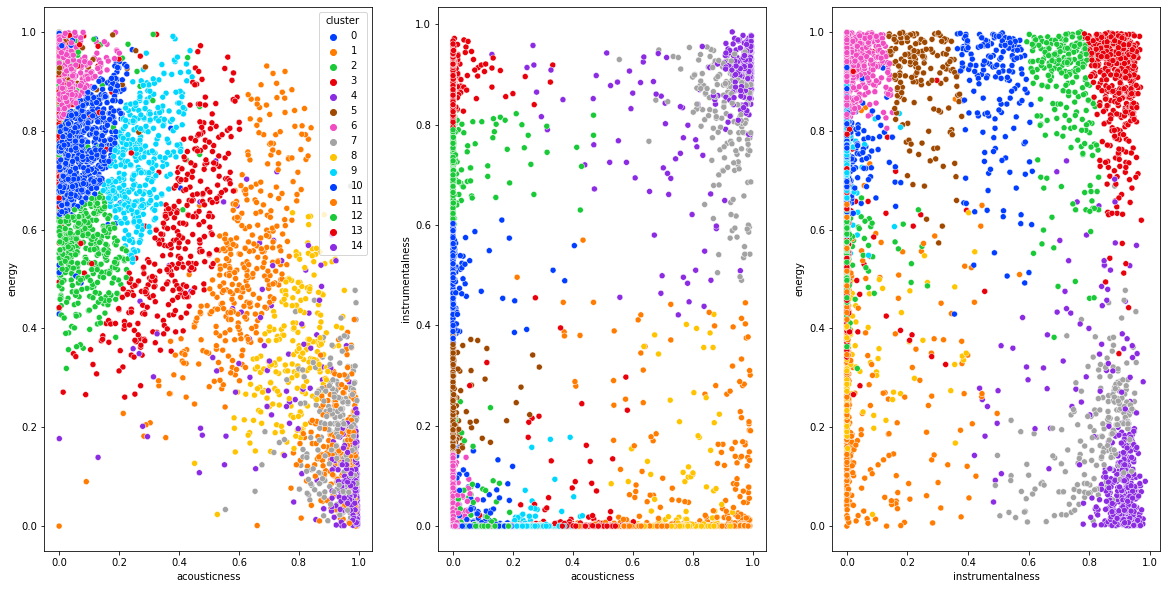

In [66]:
fig, ax = plt.subplots(1,3, figsize=(20, 10))

sns.scatterplot(data = songs_df
            , x = 'acousticness'
            , y = 'energy'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[0]);

sns.scatterplot(data = songs_df
            , x = 'acousticness'
            , y = 'instrumentalness'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[1]
            , legend=False);

sns.scatterplot(data = songs_df
            , x = 'instrumentalness'
            , y = 'energy'
            , hue = 'cluster'
            , palette = 'bright'
            , marker = 'o'
            , ax = ax[2]
            , legend=False);


## 3D Plot 

In [67]:

wo_subcluster_3D = px.scatter_3d(
    songs_df, 
    x='energy', 
    y='acousticness', 
    z='instrumentalness'
    ,color = songs_df['cluster']
    )
wo_subcluster_3D.update_layout(margin=dict(l=0, r=0, b=0, t=0))
wo_subcluster_3D.update_traces(marker_size=3, selector=dict(type='scatter3d'))
#clusters_4_3D.update_traces(marker_color=[<VALUE>], selector=dict(type='scatter3d'))
wo_subcluster_3D.show()


# COMPARE WITH SUBCLUSTERING AND WITHOUT

In [68]:

with_subcluster_3D = px.scatter_3d(
    all_clusters_df, 
    x='energy', 
    y='acousticness', 
    z='instrumentalness'
    ,color = all_clusters_df['cluster']
    )
with_subcluster_3D.update_layout(margin=dict(l=0, r=0, b=0, t=0))
with_subcluster_3D.update_traces(marker_size=3, selector=dict(type='scatter3d'))
with_subcluster_3D.show()

In [69]:
with_subcluster_3D.show()
wo_subcluster_3D.show()